# Algoritmo de Deutsch-Jozsa

In [1]:
import numpy as np

from qiskit import *

In [3]:
# Definição do Oráculo

def dj_oracle(caso, n):
    oracle = QuantumCircuit(n+1)
    
    if caso == 'c':
        oracle.i(n)
        
    elif caso == 'b':
        for i in range(n):
            oracle.cx(i, n)
    
    return oracle        

In [14]:
# Criação da porta que implementa o oráculo

n = 3

caso = np.random.choice(['b', 'c'])

Uf = dj_oracle(caso, n).to_gate()
Uf.name = '$U_f$'

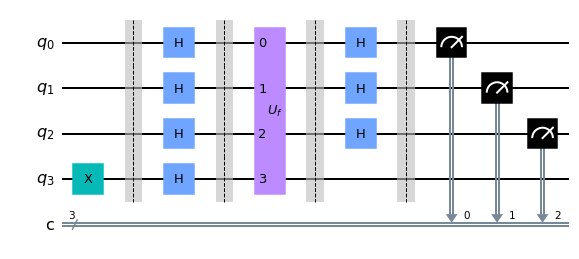

In [18]:
# Circuito do algoritmo de Deutsch-Josza

qc = QuantumCircuit(n+1, n)

qc.x(n)

qc.barrier()

qc.h(range(n+1))

qc.barrier()

qc.append(Uf, range(0, n+1))

qc.barrier()

qc.h(range(n))
    
qc.barrier()

qc.measure(range(n), range(n))

qc.draw('mpl')

In [19]:
# Execução do algoritmo

backend = Aer.get_backend('qasm_simulator')

job = execute(qc, shots = 1, backend = backend)

resultado = job.result()


# Resultados
print(resultado.get_counts())

print(caso)

{'000': 1}
c
